In [1]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Importing plotly failed. Interactive plots will not work.


In [2]:
f = pd.read_csv('C:/Users/EL FASHKA/Desktop/FABB/Recherches/Projet Simulation/biblio/Evolution_parc.csv', sep= ";")
f

,Date,Parc
0,31/12/2012,3727
1,31/12/2013,4366
2,31/12/2014,5297
3,31/12/2015,6196
4,31/12/2016,6773
5,31/12/2017,7654
6,31/12/2018,8546
7,31/12/2019,9435


In [4]:
f['Date'] = pd.DatetimeIndex(f['Date'])
f.dtypes

Date    datetime64[ns]
Parc             int64
dtype: object

In [6]:
f = f.rename(columns={'Date': 'ds',
                       'Parc': 'y'})
f

,ds,y
0,2012-12-31,3727
1,2013-12-31,4366
2,2014-12-31,5297
3,2015-12-31,6196
4,2016-12-31,6773
5,2017-12-31,7654
6,2018-12-31,8546
7,2019-12-31,9435


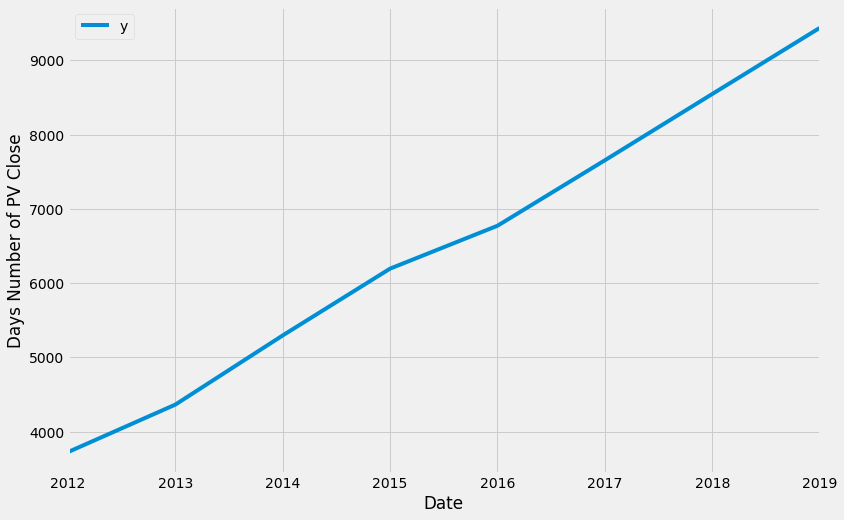

In [7]:
ax = f.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Days Number of PV Close')
ax.set_xlabel('Date')

plt.show()

In [8]:
model = Prophet(interval_width=0.95)
model.fit(f)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.


In [10]:
future_dates = model.make_future_dataframe(periods=4, freq='Y')
future_dates

,ds
0,2012-12-31
1,2013-12-31
2,2014-12-31
3,2015-12-31
4,2016-12-31
5,2017-12-31
6,2018-12-31
7,2019-12-31
8,2020-12-31
9,2021-12-31


In [28]:
forecast = model.predict(future_dates)
forecast[['ds', 'yhat']]

,ds,yhat
0,2012-12-31,3727.000000
1,2013-12-31,4366.000000
2,2014-12-31,5297.000000
3,2015-12-31,6196.000000
4,2016-12-31,6773.000000
5,2017-12-31,7654.000000
6,2018-12-31,8546.000000
7,2019-12-31,9435.000000
8,2020-12-31,10019.849526
9,2021-12-31,10915.376042


In [78]:
p=forecast[['ds', 'yhat']]
import numpy as np
g = np.array(p)
j= 2*g[:,1]
#s= p.loc[8, 'yhat']

print('Le',p.loc[8, 'ds'] , ',le parc installé est environ', j[9], 'kWc') 

Le 2020-12-31 00:00:00 ,le parc installé est environ 21830.752084821943 kWc


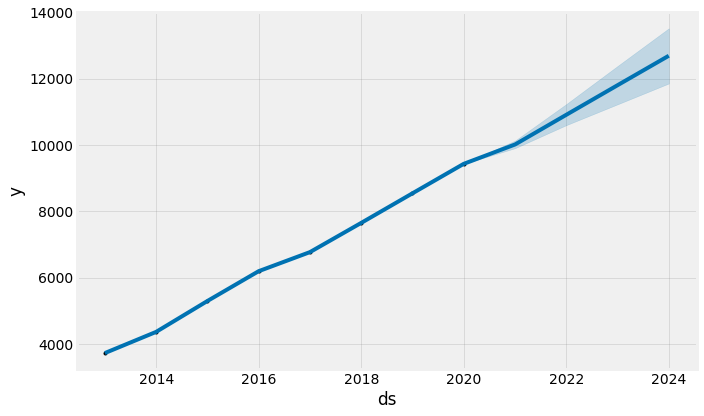

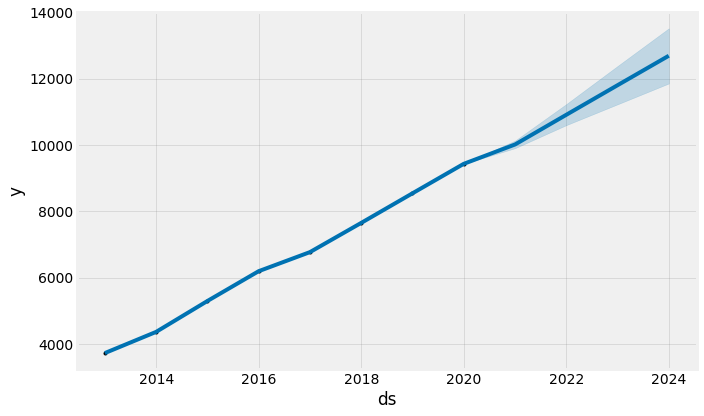

In [79]:
model.plot(forecast, uncertainty=True)

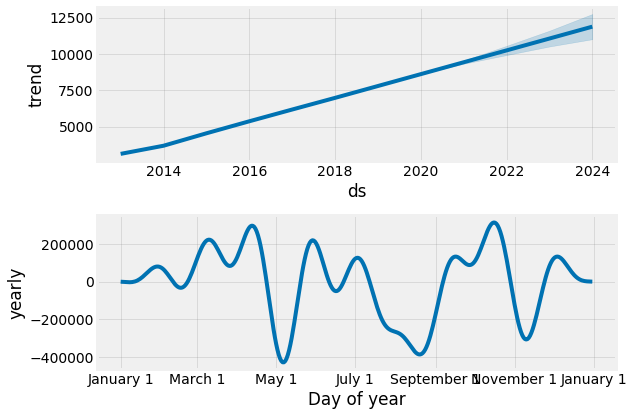

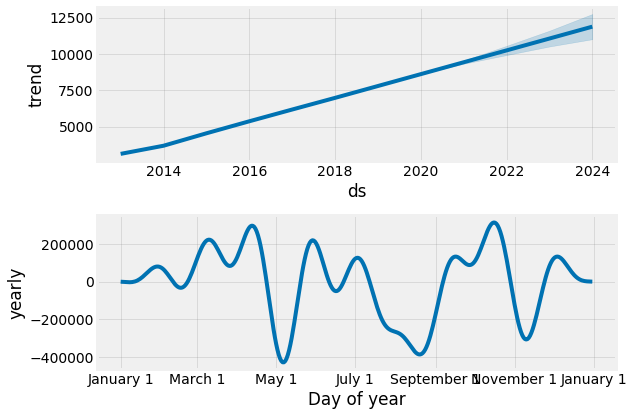

In [14]:
model.plot_components(forecast)